In [1]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
%matplotlib inline


In [2]:
x = Table().with_columns(['Y', [0,1,0,1,1,0,1,1],
                        'X1', [0,1,0,1,1,1,0,1],
                        'X2',[0,0,1,1,0,0,1,0],   
])

In [3]:
print(x)

Y    | X1   | X2
0    | 0    | 0
1    | 1    | 0
0    | 0    | 1
1    | 1    | 1
1    | 1    | 0
0    | 1    | 0
1    | 0    | 1
1    | 1    | 0


- What is $p(Y = 1)$?

In [4]:
sum(x.column('Y') ==1) / x.num_rows

0.625

- What is $p(X_1 = 1 \mid Y = 0)$

In [5]:
x_y0 = x.where('Y',0)
print(x_y0)

Y    | X1   | X2
0    | 0    | 0
0    | 0    | 1
0    | 1    | 0


In [6]:
sum(x_y0.column('X1') == 1) / x_y0.num_rows

0.33333333333333331

- What is $p(X_1 = 1 \mid Y = 1)$

In [7]:
x_y1 = x.where('Y',1)
sum(x_y1.column('X1') == 1) / x_y1.num_rows

0.80000000000000004

- What is $p(X_2 = 1 \mid Y = 0)$

In [8]:
x_y2 = x.where('Y',0)
sum(x_y2.column('X2') == 1) / x_y2.num_rows

0.33333333333333331

- What is $p(Y \mid X_1 = 1, X_2 = 0)$

In [9]:
x_y = x.where((x['X1'] == 1))
x_yy = x_y.where((x_y['X2'] == 0))
[sum(x_yy.column('Y') == 0) / x_yy.num_rows,sum(x_yy.column('Y') == 1) / x_yy.num_rows]

[0.25, 0.75]

Let us say the probability of shortage in electricity and oil is as follow:

$p(E) = 15 \%$, $p(O) = 10 \%$

dependece among variables:

$p(E \mid O) = 2p(E) = 30 \%$

Compute $p(E,O), p(E,\not O), p(\not E, O), p(\not E, \not O)$

$p(\not E, \not O) = p(\not O) - p(E, \not O)$

$p_f = 1 - p(\not E, \not O)$

In [10]:
P_EO = 0.3 * 0.1
P_EnotO = 0.15 - 0.03
P_notOE = 0.1 - 0.03
P_notEnotO = 0.9 - P_EnotO
P_f = 1 - P_notEnotO
P_f

0.21999999999999997

If we have another option, e.g. Gas

$p(G) = 20 \%$

and Gas in independent of other two

$p(\not G, \not E, \not O) = p(\not E, \not O) p(\not G)$

In [11]:
P_NGNENO = P_notEnotO * (1-0.2)
P_NGNENO

0.6240000000000001

In [12]:
P_f2 = 1 - P_NGNENO
P_f2

0.3759999999999999

The weight $x$ applied to a structure is modeled by a log-normal distribution, with mean $20 KN$ and coefficient of variation $\delta = 50 \%$

- Find parameters $(\mu, \sigma)$ of the distribution
- What is the probability that $x$ is in the range $10 KN$ and $40 KN$?

In [13]:
from scipy.stats import norm

In [14]:
mu = 20
cov = 0.5
sigma = mu*cov

$F_x(x) = \Phi (\frac{x-\mu}{\sigma})$

In [15]:
F10 = norm.cdf((10 - mu)/sigma) 
F40 = norm.cdf((40 - mu)/sigma) 

In [16]:
p = F40 - F10
p

0.81859461412036372

What is the probability of $x$ being negative? Why this happens?

In [17]:
F0 = norm.cdf((0-mu)/sigma)
F0

0.022750131948179195

# Real data exploration

In [18]:
data = Table.read_table('bay_area_census_age.csv')


In [ ]:
data

Assume variable $X$ represents the population in our database:


1. what is $p(X_\text{female} \geq X_\text{male})$
2. what is $p(X_\text{female} \geq X_\text{male} \mid \text{county = 75})$
3. what is $p(X_\text{female} \geq X_\text{male} \mid \text{county = 75}, \text{age} \leq 24)$

In [20]:
# Answering question 1:

q1 = data.select(['Total Population','Female', 'Male'])

q1['condition'] = q1['Female'] > q1['Male']

p = np.sum(np.asarray(q1['condition'])) / q1.num_rows * 100
p

68.718320057929034

In [21]:
totalpop = np.sum(np.asarray(q1['Total Population']))
q1['weight'] = q1['Total Population'] / totalpop

sum(q1['condition'] * q1['weight']) * 100


69.470802288413935

In [22]:
# Answering question 2
q2 = data.where(data['COUNTY'] == 75).select(['Total Population','Female', 'Male'])

q2['condition'] = q2['Female'] > q2['Male']
totalpop = np.sum(np.asarray(q2['Total Population']))
q2['weight'] = q2['Total Population'] / totalpop
sum(q2['condition'] * q2['weight']) * 100

57.892416499531173

Let us do some statistics now:

1. Compare the expected value of population for age group 20 to 24 years in county 1 and 75?
2. What is 95% confidence interval question 1? 

note: 95% confidence interval for variable $X$ is defined as:

$[\mathbf{E}[X] - 2 \sigma_X, \mathbf{E}[X] + 2 \sigma_X]$

In [23]:
qq1 = data.where(data['COUNTY'] == 1).select(['20 to 24 years'])
x1 = np.mean(np.asarray(qq1['20 to 24 years']))
qq2 = data.where(data['COUNTY'] == 75).select(['20 to 24 years'])
x2 = np.mean(np.asarray(qq2['20 to 24 years']))

print(x1,x2)

296.534626039 307.705583756


In [24]:
sd1 = np.std(np.asarray(qq1['20 to 24 years']))
sd2 = np.std(np.asarray(qq2['20 to 24 years']))
print([np.max([x1-2*sd1,0]),x1+2*sd1])
print([np.max([x2-2*sd2,0]),x2+2*sd2])

[0.0, 914.06606964858565]
[0.0, 693.20058293668876]


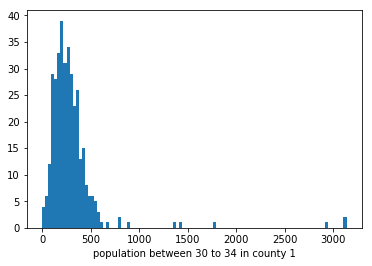

In [25]:
plots.hist(qq1['20 to 24 years'],bins = 100)
plots.xlabel("population between 30 to 34 in county 1")

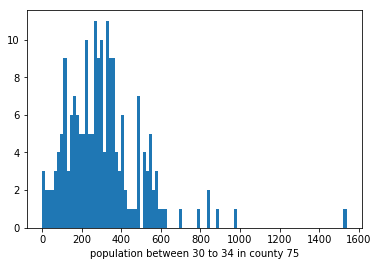

In [26]:
plots.hist(qq2['20 to 24 years'],bins = 100)
plots.xlabel("population between 30 to 34 in county 75")